In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Linear Regression

In [2]:
housing = fetch_california_housing()

In [3]:
m, n = housing.data.shape

In [4]:
m, n

(20640, 8)

In [5]:
housing_data_with_bias = np.c_[np.ones((m,1)), housing.data]

In [6]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
# Reshape the target array into a column
y_target = housing.target.reshape(-1, 1)

In [8]:
y = y_target

In [9]:
X = housing_data_with_bias

In [10]:
# Linear relationship
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [11]:
theta

array([[-3.69419202e+01],
       [ 4.36693293e-01],
       [ 9.43577803e-03],
       [-1.07322041e-01],
       [ 6.45065694e-01],
       [-3.97638942e-06],
       [-3.78654265e-03],
       [-4.21314378e-01],
       [-4.34513755e-01]])

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()

In [14]:
lin_reg.fit(housing.data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lin_reg.intercept_

array([-36.94192021])

In [16]:
lin_reg.coef_

array([[ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,
         6.45065694e-01, -3.97638942e-06, -3.78654265e-03,
        -4.21314378e-01, -4.34513755e-01]])

In [17]:
np.r_[lin_reg.intercept_.reshape(-1,1), lin_reg.coef_.T]

array([[-3.69419202e+01],
       [ 4.36693293e-01],
       [ 9.43577803e-03],
       [-1.07322041e-01],
       [ 6.45065694e-01],
       [-3.97638942e-06],
       [-3.78654265e-03],
       [-4.21314378e-01],
       [-4.34513755e-01]])

In [18]:
X = tf.constant(housing_data_with_bias, dtype=tf.float32)

In [19]:
y = tf.constant(y_target, dtype=tf.float32)

In [20]:
XT = tf.transpose(X)

In [21]:
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

In [22]:
with tf.Session()as sess:
    theta_val = theta.eval()

In [23]:
theta_val

array([[-3.7171074e+01],
       [ 4.3633682e-01],
       [ 9.3871783e-03],
       [-1.0717344e-01],
       [ 6.4540231e-01],
       [-4.1238391e-06],
       [-3.7809242e-03],
       [-4.2373490e-01],
       [-4.3720812e-01]], dtype=float32)

In [24]:
Train_X = np.asarray([3.3, 4.4, 5.5, 6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])

In [25]:
Train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.901,2.42,2.94,1.3])

In [26]:
print(Train_X.shape)
print(Train_Y.shape)
num_sample = Train_X.shape[0]

(17,)
(17,)


In [27]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

In [28]:
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
# Operation for Linear Model
pred = tf.add(tf.multiply(X, W), b)

In [30]:
# Operation for calculating the Error
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * num_sample)

In [31]:
# Use Gradient Descent Optimizer
optim = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [32]:
init = tf.global_variables_initializer()

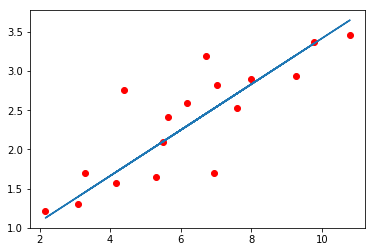

In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(1000):
        for (x, y) in zip(Train_X, Train_Y):
            sess.run(optim, feed_dict={X: x ,Y: y})
            
    plt.plot(Train_X, Train_Y, 'ro')
    plt.plot(Train_X, sess.run(W) * Train_X + sess.run(b))
    plt.show()

# Logistic Regression

In [34]:
from tensorflow.examples.tutorials.mnist import input_data

In [35]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [36]:
learning_rate = 0.01
epochs = 25
batch_size = 100

In [37]:
x = tf.placeholder('float', [None, 28*28])
y = tf.placeholder('float', [None, 10])

In [38]:
w = tf.Variable(np.zeros([28*28, 10]), dtype=tf.float32)
b = tf.Variable(np.zeros([10]), dtype=tf.float32)

In [39]:
pred = tf.nn.softmax(tf.matmul(x, w) + b)

In [40]:
# This is the different cost function (not sure what it does)
cost = tf.reduce_mean(-tf.reduce_sum(y + tf.log(pred), reduction_indices=1))

In [41]:
optim = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [42]:
init = tf.global_variables_initializer()

In [43]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        total_batch = mnist.train.num_examples//batch_size
        
        for batch in range(total_batch):
            xs, ys = mnist.train.next_batch(batch_size)
            sess.run(optim, feed_dict={x:xs, y:ys})
        
    label = tf.argmax(pred,1)
    corr_pred = tf.equal(label, tf.argmax(y,1))
    accuracy = tf.reduce_sum(tf.cast(corr_pred, tf.float32))
    print(accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

271.0


In [44]:
tf.reset_default_graph()